# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Institut

- Nama: Dewi Kunthi Siswati Suryo
- Email: dewikunthi6@gmail.com
- Id Dicoding: dewi_desis

## Persiapan

### Menyiapkan library yang dibutuhkan

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy import stats
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

### Menyiapkan data yang akan digunakan

## Data Understanding

### Membuka dataset

In [2]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'\xef\xbb\xbfMarital_status;Application_mode;Application_order;Course;Daytime_evening_attendance;Previous_qualification;Previous_qualification_grade;Nacionality;Mothers_qualification;Fathers_qualification;Mothers_occupation;Fathers_occupation;Admission_grade;Displaced;Educational_special_needs;Debtor;Tuition_fees_up_to_date;Gender;Scholarship_holder;Age_at_enrollment;International;Curricular_units_1st_sem_credited;Curricular_units_1st_sem_enrolled;Curricular_units_1st_sem_evaluations;Curricular_units_1st_sem_approved;Curricular_units_1st_sem_grade;Curricular_units_1st_sem_without_evaluations;Curricular_units_2nd_sem_credited;Curricular_units_2nd_sem_enrolled;Curricular_units_2nd_sem_evaluations;Curricular_units_2nd_sem_approved;Curricular_units_2nd_sem_grade;Curricular_units_2nd_sem_without_evaluations;Unemployment_rate;Inflation_rate;GDP;Status\r\n1;17;5;171;1;1;122;1;19;12;5;9;127.3;1;0;0;1;1;0;20;0;0;0;0;0;0;0;0;0;0;0;0;0;10.8;1.4;1.74;Dropout\r\n1;15;1;9254;1;1;160;1;

In [3]:
df = pd.read_csv('/content/data.csv', sep = ';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Mengecek jumlah baris dan kolom

In [4]:
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah baris dan kolom: (4424, 37)


### Memuat informasi dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Dataset terdiri atas 4424 baris dan 37 kolom. Berikut merupakan keterangan dataset:
**DESKRIPSI VARIABEL**

*  Marital status : The marital status of the student. (Categorical)
   - 1-single
   - 2-married
   - 3-widower
   - 4-divorced
   - 5-facto union
   - 6-legally separated.

*  Application mode : The method of application used by the student. (Categorical)
   - 1 - 1st phase - general contingent
   - 2 - Ordinance No. 612/93
   - 5 - 1st phase - special contingent (Azores Island)
   - 7 - Holders of other higher courses
   - 10 - Ordinance No. 854-B/99
   - 15 - International student (bachelor)
   - 16 - 1st phase - special contingent (Madeira Island)
   - 17 - 2nd phase - general contingent
   - 18 - 3rd phase - general contingent
   - 26 - Ordinance No. 533-A/99, item b2) (Different Plan)
   - 27 - Ordinance No. 533-A/99, item b3 (Other Institution)
   - 39 - Over 23 years old
   - 42 - Transfer
   - 43 - Change of course
   - 44 - Technological specialization diploma holders
   - 51 - Change of institution/course
   - 53 - Short cycle diploma holders
   - 57 - Change of institution/course (International)

*  Application order : The order in which the student applied. (Numerical) Application order (between 0 - first choice; and 9 last choice)

*  Course : The course taken by the student. (Categorical)
   - 33 - Biofuel Production Technologies
   - 171 - Animation and Multimedia Design
   - 8014 - Social Service (evening attendance)
   - 9003 - Agronomy 9070 - Communication Design
   - 9085 - Veterinary Nursing
   - 9119 - Informatics Engineering
   - 9130 - Equinculture
   - 9147 - Management
   - 9238 - Social Service
   - 9254 - Tourism
   - 9500 - Nursing
   - 9556 - Oral Hygiene
   - 9670 - Advertising and Marketing Management
   - 9773 - Journalism and Communication
   - 9853 - Basic Education
   - 9991 - Management (evening attendance)

*  Daytime/evening attendance : Whether the student attends classes during the day or in the evening. (Categorical)
   - 1 - daytime
   - 0 - evening

*  Previous qualification : The qualification obtained by the student before enrolling in higher education. (Categorical)
   - 1 - Secondary education
   - 2 - Higher education - bachelor's degree
   - 3 - Higher education - degree
   - 4 - Higher education - master's
   - 5 - Higher education - doctorate
   - 6 - Frequency of higher education
   - 9 - 12th year of schooling - not completed
   - 10 - 11th year of schooling - not completed
   - 12 - Other - 11th year of schooling
   - 14 - 10th year of schooling
   - 15 - 10th year of schooling - not completed
   - 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
   - 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
   - 39 - Technological specialization course
   - 40 - Higher education - degree (1st cycle)
   - 42 - Professional higher technical course
   - 43 - Higher education - master (2nd cycle)

*  Previous qualification (grade) : Grade of previous qualification (between 0 and 200)

*  Nacionality : The nationality of the student. (Categorical)
   - 1 - Portuguese;
   - 2 - German;
   - 6 - Spanish;
   - 11 - Italian;
   - 13 - Dutch;
   - 14 - English;
   - 17 - Lithuanian;
   - 21 - Angolan;
   - 22 - Cape Verdean;
   - 24 - Guinean;
   - 25 - Mozambican;
   - 26 - Santomean;
   - 32 - Turkish;
   - 41 - Brazilian;
   - 62 - Romanian;
   - 100 - Moldova (Republic of);
   - 101 - Mexican;
   - 103 - Ukrainian;
   - 105 - Russian;
   - 108 - Cuban;
   - 109 - Colombian

*  Mother's qualification : The qualification of the student's mother. (Categorical)
   - 1 - Secondary Education - 12th Year of Schooling or Eq.
   - 2 - Higher Education - Bachelor's Degree
   - 3 - Higher Education - Degree
   - 4 - Higher Education - Master's
   - 5 - Higher Education - Doctorate
   - 6 - Frequency of Higher Education
   - 9 - 12th Year of Schooling - Not Completed
   - 10 - 11th Year of Schooling - Not Completed
   - 11 - 7th Year (Old)
   - 12 - Other - 11th Year of Schooling
   - 14 - 10th Year of Schooling
   - 18 - General commerce course
   - 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
   - 22 - Technical-professional course
   - 26 - 7th year of schooling
   - 27 - 2nd cycle of the general high school course
   - 29 - 9th Year of Schooling - Not Completed
   - 30 - 8th year of schooling
   - 34 - Unknown
   - 35 - Can't read or write
   - 36 - Can read without having a 4th year of schooling
   - 37 - Basic education 1st cycle (4th/5th year) or equiv.
   - 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
   - 39 - Technological specialization course
   - 40 - Higher education - degree (1st cycle)
   - 41 - Specialized higher studies course
   - 42 - Professional higher technical course
   - 43 - Higher Education - Master (2nd cycle)
   - 44 - Higher Education - Doctorate (3rd cycle)

*  Father's qualification : The qualification of the student's father. (Categorical)
    - 1 - Secondary Education - 12th Year of Schooling or Eq.
    - 2 - Higher Education - Bachelor's Degree
    - 3 - Higher Education - Degree
    - 4 - Higher Education - Master's
    - 5 - Higher Education - Doctorate
    - 6 - Frequency of Higher Education
    - 9 - 12th Year of Schooling - Not Completed
    - 10 - 11th Year of Schooling - Not Completed
    - 11 - 7th Year (Old)
    - 12 - Other - 11th Year of Schooling
    - 13 - 2nd year complementary high school course
    - 14 - 10th Year of Schooling
    - 18 - General commerce course
    - 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
    - 20 - Complementary High School Course
    - 22 - Technical-professional course
    - 25 - Complementary High School Course - not concluded
    - 26 - 7th year of schooling
    - 27 - 2nd cycle of the general high school course
    - 29 - 9th Year of Schooling - Not Completed
    - 30 - 8th year of schooling
    - 31 - General Course of Administration and Commerce
    - 33 - Supplementary Accounting and Administration
    - 34 - Unknown
    - 35 - Can't read or write
    - 36 - Can read without having a 4th year of schooling
    - 37 - Basic education 1st cycle (4th/5th year) or equiv.
    - 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
    - 39 - Technological specialization course
    - 40 - Higher education - degree (1st cycle)
    - 41 - Specialized higher studies course
    - 42 - Professional higher technical course
    - 43 - Higher Education - Master (2nd cycle)
    - 44 - Higher Education - Doctorate (3rd cycle)

*  Mother's occupation: The occupation of the student's mother. (Categorical)
    - 0 - Student
    - 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    - 2 - Specialists in Intellectual and Scientific Activities
    - 3 - Intermediate Level Technicians and Professions
    - 4 - Administrative staff
    - 5 - Personal Services, Security and Safety Workers and Sellers
    - 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
    - 7 - Skilled Workers in Industry, Construction and Craftsmen
    - 8 - Installation and Machine Operators and Assembly Workers
    - 9 - Unskilled Workers
    - 10 - Armed Forces Professions
    - 90 - Other Situation
    - 99 - (blank)
    - 122 - Health professionals
    - 123 - teachers
    - 125 - Specialists in information and communication technologies (ICT)
    - 131 - Intermediate level science and engineering technicians and professions
    - 132 - Technicians and professionals, of intermediate level of health
    - 134 - Intermediate level technicians from legal, social, sports, cultural and similar services
    - 141 - Office workers, secretaries in general and data processing operators
    - 143 - Data, accounting, statistical, financial services and registry-related operators
    - 144 - Other administrative support staff
    - 151 - personal service workers
    - 152 - sellers
    - 153 - Personal care workers and the like
    - 171 - Skilled construction workers and the like, except electricians
    - 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like
    - 175 - Workers in food processing, woodworking, clothing and other industries and crafts
    - 191 - cleaning workers
    - 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
    - 193 - Unskilled workers in extractive industry, construction, manufacturing and transport
    - 194 - Meal preparation assistants

*  Father's occupation : The occupation of the student's father. (Categorical)  
    - 0 - Student
    - 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
    - 2 - Specialists in Intellectual and Scientific Activities
    - 3 - Intermediate Level Technicians and Professions
    - 4 - Administrative staff
    - 5 - Personal Services, Security and Safety Workers and Sellers
    - 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
    - 7 - Skilled Workers in Industry, Construction and Craftsmen
    - 8 - Installation and Machine Operators and Assembly Workers
    - 9 - Unskilled Workers
    - 10 - Armed Forces Professions
    - 90 - Other Situation
    - 99 - (blank)
    - 101 - Armed Forces Officers
    - 102 - Armed Forces Sergeants
    - 103 - Other Armed Forces personnel
    - 112 - Directors of administrative and commercial services
    - 114 - Hotel, catering, trade and other services directors
    - 121 - Specialists in the physical sciences, mathematics, engineering and related techniques
    - 122 - Health professionals
    - 123 - teachers
    - 124 - Specialists in finance, accounting, administrative organization, public and commercial relations
    - 131 - Intermediate level science and engineering technicians and professions
    - 132 - Technicians and professionals, of intermediate level of health
    - 134 - Intermediate level technicians from legal, social, sports, cultural and similar services
    - 135 - Information and communication technology technicians
    - 141 - Office workers, secretaries in general and data processing operators
    - 143 - Data, accounting, statistical, financial services and registry-related operators
    - 144 - Other administrative support staff
    - 151 - personal service workers
    - 152 - sellers
    - 153 - Personal care workers and the like
    - 154 - Protection and security services personnel
    - 161 - Market-oriented farmers and skilled agricultural and animal production workers
    - 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
    - 171 - Skilled construction workers and the like, except electricians
    - 172 - Skilled workers in metallurgy, metalworking and similar
    - 174 - Skilled workers in electricity and electronics
    - 175 - Workers in food processing, woodworking, clothing and other industries and crafts
    - 181 - Fixed plant and machine operators
    - 182 - assembly workers
    - 183 - Vehicle drivers and mobile equipment operators
    - 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
    - 193 - Unskilled workers in extractive industry, construction, manufacturing and transport
    - 194 - Meal preparation assistants
    - 195 - Street vendors (except food) and street service providers

*  Admission grade : Admission grade (between 0 and 200)

*  Displaced : Whether the student is a displaced person. (Categorical)
    - 1-yes
    - 0-no

*  Educational special needs : Whether the student has any special educational needs. (Categorical)
    - 1-yes
    - 0-no

*  Debtor : Whether the student is a debtor. (Categorical)
    - 1-yes
    - 0-no

*  Tuition fees up to date : Whether the student's tuition fees are up to date. (Categorical)
    - 1-yes
    - 0-no

*  Gender : The gender of the student. (Categorical)
    - 1-male
    - 0-female

*  Scholarship holder : Whether the student is a scholarship holder. (Categorical)
    - 1-yes
    - 0-no

*  Age at enrollment : The age of the student at the time of enrollment. (Numerical)

*  International : Whether the student is an international student. (Categorical)
    - 1-yes
    - 0-no

*  Curricular units 1st sem (credited) : The number of curricular units credited by the student in the first semester. (Numerical)

*  Curricular units 1st sem (enrolled) : The number of curricular units enrolled by the student in the first semester. (Numerical)

*  Curricular units 1st sem (evaluations) : The number of curricular units evaluated by the student in the first semester. (Numerical)

*  Curricular units 1st sem (approved) : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_1st_sem_grade : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_1st_sem_without_evaluations : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_credited : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_enrolled : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_evaluations : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_approved : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_grade : The number of curricular units approved by the student in the first semester. (Numerical)

*  Curricular_units_2nd_sem_without_evaluations : The number of curricular units approved by the student in the first semester. (Numerical)

*  Unemployment_rate: This refers to the unemployment rate, most likely in the student's region or country of origin. The visible values indicate the percentage of the unemployment rate.

*  Inflation_rate: This is the inflation rate, also likely in the student's region or country of origin. The visible values indicate the percentage of the inflation rate. A negative number means deflation has occurred.

*  GDP: This is the Gross Domestic Product, likely per capita, in the student's region or country of origin. These figures could represent GDP growth or GDP value on a certain scale. A negative number indicates economic contraction.

*  Status: This is the student's final status. From the visible data, there are three main categories:
    - Dropout: The student dropped out of college or did not complete their studies.
    - Graduate: The student has graduated from their study program.
    - Enrolled: The student is still registered or currently undertaking their studies.

Source: [Dicoding Dataset](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/README.md)

## Data Preparation / Preprocessing

### Menampilkan statistika deskriptif

In [6]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Mengecek nilai unik pada kolom

In [7]:
for col in df.columns:
  unique_counts = df[col].nunique()
  print(f"Kolom '{col}' memiliki {unique_counts} nilai unik")

Kolom 'Marital_status' memiliki 6 nilai unik
Kolom 'Application_mode' memiliki 18 nilai unik
Kolom 'Application_order' memiliki 8 nilai unik
Kolom 'Course' memiliki 17 nilai unik
Kolom 'Daytime_evening_attendance' memiliki 2 nilai unik
Kolom 'Previous_qualification' memiliki 17 nilai unik
Kolom 'Previous_qualification_grade' memiliki 101 nilai unik
Kolom 'Nacionality' memiliki 21 nilai unik
Kolom 'Mothers_qualification' memiliki 29 nilai unik
Kolom 'Fathers_qualification' memiliki 34 nilai unik
Kolom 'Mothers_occupation' memiliki 32 nilai unik
Kolom 'Fathers_occupation' memiliki 46 nilai unik
Kolom 'Admission_grade' memiliki 620 nilai unik
Kolom 'Displaced' memiliki 2 nilai unik
Kolom 'Educational_special_needs' memiliki 2 nilai unik
Kolom 'Debtor' memiliki 2 nilai unik
Kolom 'Tuition_fees_up_to_date' memiliki 2 nilai unik
Kolom 'Gender' memiliki 2 nilai unik
Kolom 'Scholarship_holder' memiliki 2 nilai unik
Kolom 'Age_at_enrollment' memiliki 46 nilai unik
Kolom 'International' memiliki

In [8]:
columns_to_check =['Marital_status',
 'Application_mode',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'International',
 'Status']

for col in columns_to_check:
    unique_values = df[col].unique()
    print(f"Nilai unik di kolom '{col}': {unique_values}")
    print("-" * 30)

Nilai unik di kolom 'Marital_status': [1 2 4 3 5 6]
------------------------------
Nilai unik di kolom 'Application_mode': [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
------------------------------
Nilai unik di kolom 'Course': [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
------------------------------
Nilai unik di kolom 'Daytime_evening_attendance': [1 0]
------------------------------
Nilai unik di kolom 'Previous_qualification': [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
------------------------------
Nilai unik di kolom 'Nacionality': [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
------------------------------
Nilai unik di kolom 'Mothers_qualification': [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
------------------------------
Nilai unik di kolom 'Fathers_qualification': [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41

### Mengecek data kosong

In [9]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Tidak terdapat data kosong.

### Mengecek data duplikat

In [10]:
duplicate = df.duplicated().sum()
print(f'Jumlah data duplikat: {duplicate}')

Jumlah data duplikat: 0


Tidak terdapat data yang duplikat.

### Melakukan encoding pada kolom `Status`

In [11]:
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

### Melihat mapping label yang telah diencode

In [12]:
print('Mapping label nilai yang di encode:')
for label, value in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
  print(f'{label}: {value}')

print('\n Target array yang di encode:')
print(df['Status'])

Mapping label nilai yang di encode:
Dropout: 0
Enrolled: 1
Graduate: 2

 Target array yang di encode:
0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: Status, Length: 4424, dtype: int64


### Mengubah nilai target 1 dan 2 menjadi 1

In [13]:
df['Status'] = df['Status'].replace({1: 1, 2: 1})

print(df)

      Marital_status  Application_mode  Application_order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                   

In [14]:
df['Status'].value_counts()

,count
Status,
1,3003
0,1421


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [16]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.678797
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.466991
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,1.000000


### Melakukan drop pada kolom yang tidak digunakan

In [17]:
df = df.drop(columns=['Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade'])
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,0,13.9,-0.3,0.79,1


In [18]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,0.150316,11.566139,1.228029,0.001969,0.678797
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,0.753774,2.663850,1.382711,2.269935,0.466991
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,0.000000,13.900000,2.600000,1.790000,1.000000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,12.000000,16.200000,3.700000,3.510000,1.000000


### Mengubah tipe data menjadi string

In [19]:
columns_to_convert = ['Marital_status', 'Application_mode', 'Application_order', 'Course',
                      'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality',
                      'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation',
                      'Fathers_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
                      'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International',
                      'Status']

df[columns_to_convert] = df[columns_to_convert].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

### Feature engineering

#### Melihat rasio unit approved

In [20]:
df['Ratio_approved_1st_sem'] = df['Curricular_units_1st_sem_approved'] / df['Curricular_units_1st_sem_enrolled']
df['Ratio_approved_2nd_sem'] = df['Curricular_units_2nd_sem_approved'] / df['Curricular_units_2nd_sem_enrolled']

df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
count,4424,4424,4424,4424,4424,4424,4424.000000,4424,4424,4424,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424,4244.000000,4244.000000
unique,6,18,8,17,2,17,NaN,21,29,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,1,1,1,9500,1,1,NaN,1,1,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
freq,3919,1708,3026,766,3941,3717,NaN,4314,1069,1209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3003,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,132.613314,NaN,NaN,NaN,...,6.232143,8.063291,4.435805,0.150316,11.566139,1.228029,0.001969,NaN,0.727484,0.688364
std,NaN,NaN,NaN,NaN,NaN,NaN,13.188332,NaN,NaN,NaN,...,2.195951,3.947951,3.014764,0.753774,2.663850,1.382711,2.269935,NaN,0.342821,0.365513
min,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,125.000000,NaN,NaN,NaN,...,5.000000,6.000000,2.000000,0.000000,9.400000,0.300000,-1.700000,NaN,0.600000,0.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,133.100000,NaN,NaN,NaN,...,6.000000,8.000000,5.000000,0.000000,11.100000,1.400000,0.320000,NaN,0.857143,0.833333
75%,NaN,NaN,NaN,NaN,NaN,NaN,140.000000,NaN,NaN,NaN,...,7.000000,10.000000,6.000000,0.000000,13.900000,2.600000,1.790000,NaN,1.000000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   object 
 1   Application_mode                              4424 non-null   object 
 2   Application_order                             4424 non-null   object 
 3   Course                                        4424 non-null   object 
 4   Daytime_evening_attendance                    4424 non-null   object 
 5   Previous_qualification                        4424 non-null   object 
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   object 
 8   Mothers_qualification                         4424 non-null   object 
 9   Fathers_qualification                         4424 non-null   o

#### Mengecek data kosong

In [22]:
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


#### Menghapus data kosong

In [23]:
df = df.dropna()
df.isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4244 entries, 1 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4244 non-null   object 
 1   Application_mode                              4244 non-null   object 
 2   Application_order                             4244 non-null   object 
 3   Course                                        4244 non-null   object 
 4   Daytime_evening_attendance                    4244 non-null   object 
 5   Previous_qualification                        4244 non-null   object 
 6   Previous_qualification_grade                  4244 non-null   float64
 7   Nacionality                                   4244 non-null   object 
 8   Mothers_qualification                         4244 non-null   object 
 9   Fathers_qualification                         4244 non-null   object

## Exploratory Data Analysis (EDA)

### Kolom kategorikal

In [25]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Nacionality',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Educational_special_needs',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'International',
 'Status']

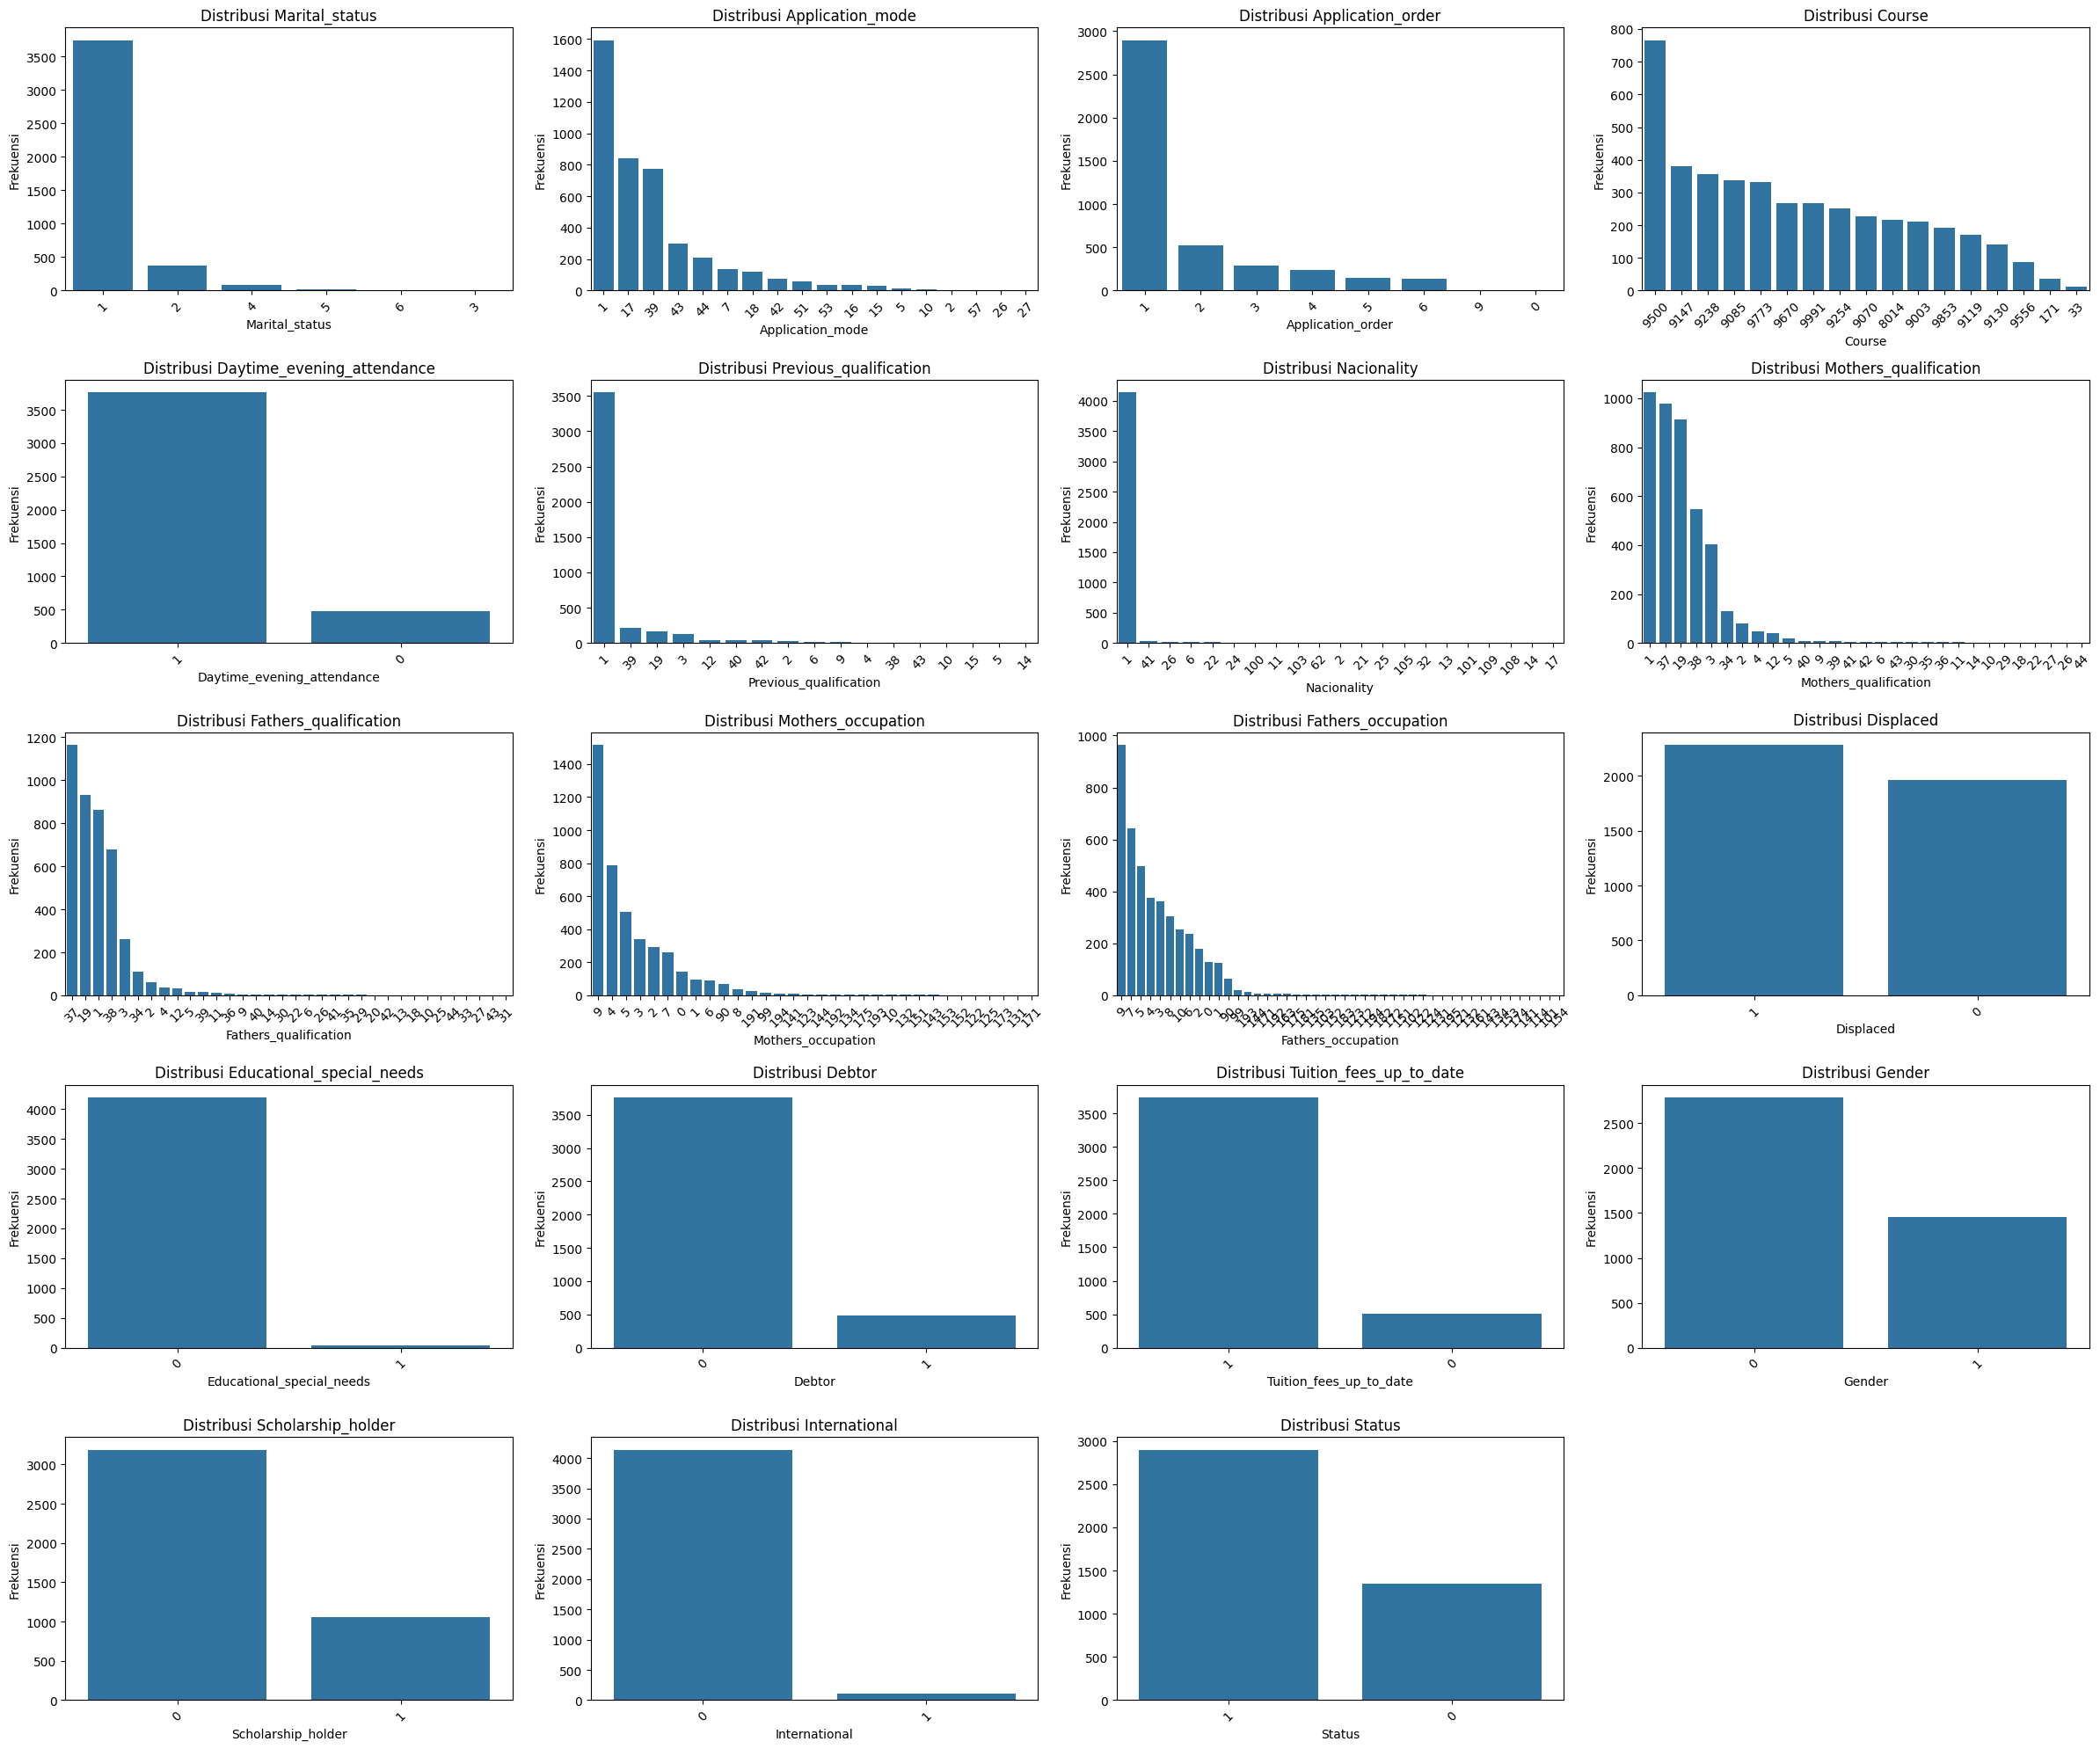

In [26]:
def plot_categorical_bar_charts(df, categorical, cols_per_row=4):
    n_cols = len(categorical)
    n_rows = int(np.ceil(n_cols / cols_per_row))

    fig, axes = plt.subplots(nrows=n_rows, ncols=cols_per_row, figsize=(cols_per_row * 6, n_rows * 4))

    for i, col in enumerate(categorical):
        row_idx = i // cols_per_row
        col_idx = i % cols_per_row

        if n_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]

        # Menghitung frekuensi setiap kategori
        counts = df[col].value_counts()
        sns.barplot(x=counts.index, y=counts.values, ax=ax)

        ax.set_title(f'Distribusi {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frekuensi')
        ax.tick_params(axis='x', rotation=45)

    if n_cols < n_rows * cols_per_row:
        for j in range(n_cols, n_rows * cols_per_row):
            if n_rows > 1:
                fig.delaxes(axes.flatten()[j])
            else:
                fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_categorical_bar_charts(df, categorical)

1. Marital_status
  - Paling banyak: Kategori 1 (Single)
  - Paling sedikit: Kategori 3 (Widower)

2. Application_mode
  - Paling banyak: Kategori 1
  - Paling sedikit: Kategori 26, 27, 57 (masing-masing sangat jarang muncul)

3. Application_order
  - Paling banyak: Kategori 1 (pilihan pertama)
  - Paling sedikit: Kategori 8, 9, 0

4. Course
  - Paling banyak: Kategori 9500 (Nursing)
  - Paling sedikit: Kategori di kanan grafik (mungkin seperti Biofuel Production, dll.)

5. Daytime_evening_attendance
  - Paling banyak: Kategori 1 (Daytime)
  - Paling sedikit: Kategori 0 (Evening)

6. Previous_qualification
  - Paling banyak: Kategori 1 (Secondary Education)
  - Paling sedikit: Kategori 5, 14 (nilai sangat kecil)

7. Nationality
  - Paling banyak: Kategori 1 (Portuguese)
  - Paling sedikit: Kategori negara lain seperti 13, 14, 17, 32, 108, 109

8. Mothers_qualification
  - Paling banyak: Kategori 1 (Secondary Education – 12th year)
  - Paling sedikit: Kategori 44, 27, 26, 22, 18

9. Fathers_qualification
  - Paling banyak: Kategori 37 (Basic education – 1st cycle)
  - Paling sedikit: Kategori 44, 42, 33, 31, 27, 25, 20, 18, 13

10. Mothers_occupation
  - Paling banyak: Kategori 9 (Unskilled Workers)
  - Paling sedikit: Kategori 173, 171, 131, 125

11. Fathers_occupation
  - Paling banyak: Kategori 9 (Unskilled Workers)
  - Paling sedikit: Kategori 195, 174, 161, 154, 153, 143, 141, 134, 132, 131, 124, 121, 114, 101

12. Displaced
  - Paling banyak: Kategori 1 (Yes)
  - Paling sedikit: Kategori 0 (No)

13. Educational_special_needs
  - Paling banyak: Kategori 0 (No)
  - Paling sedikit: Kategori 1 (Yes)

14. Debtor
  - Paling banyak: Kategori 0 (No)
  - Paling sedikit: Kategori 1 (Yes)

15. Tuition_fees_up_to_date
  - Paling banyak: Kategori 1 (Yes)
  - Paling sedikit: Kategori 0 (No)

16. Gender
  - Paling banyak: Kategori 1 (Female)
  - Paling sedikit: Kategori 0 (Male)

17. Scholarship_holder
  - Paling banyak: Kategori 0 (No)
  - Paling sedikit: Kategori 1 (Yes)

18. International
  - Paling banyak: Kategori 0 (No)
  - Paling sedikit: Kategori 1 (Yes)

19. Status
  - Paling banyak: Kategori 2 (Graduate)
  - Paling sedikit: Kategori 1 (Enrolled)

In [27]:
def chi_square_test_all_categorical(df, categorical):
    for col1, col2 in combinations(categorical, 2):
        if col1 not in df.columns or col2 not in df.columns:
            print(f"Peringatan: Salah satu atau kedua kolom '{col1}' atau '{col2}' tidak ditemukan.")
            continue

        print(f"\n--- Uji Chi-Square antara '{col1}' dan '{col2}' ---")
        cross_tab = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, expected = chi2_contingency(cross_tab)

        print("Chi-Square Statistic:", chi2)
        print("P-value:", p)
        print("Degrees of Freedom:", dof)

        alpha = 0.05
        if p < alpha:
            print(f"Kesimpulan: Ada hubungan yang signifikan antara '{col1}' dan '{col2}'.")
        else:
            print(f"Kesimpulan: Tidak ada cukup bukti untuk menyimpulkan adanya hubungan antara '{col1}' dan '{col2}'.")

chi_square_test_all_categorical(df, categorical)


--- Uji Chi-Square antara 'Marital_status' dan 'Application_mode' ---
Chi-Square Statistic: 1141.2371200819364
P-value: 1.8613601504172646e-184
Degrees of Freedom: 85
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status' dan 'Application_mode'.

--- Uji Chi-Square antara 'Marital_status' dan 'Application_order' ---
Chi-Square Statistic: 143.32285425656647
P-value: 4.6644450368721535e-15
Degrees of Freedom: 35
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status' dan 'Application_order'.

--- Uji Chi-Square antara 'Marital_status' dan 'Course' ---
Chi-Square Statistic: 658.9940234717001
P-value: 6.956637104567273e-92
Degrees of Freedom: 80
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status' dan 'Course'.

--- Uji Chi-Square antara 'Marital_status' dan 'Daytime_evening_attendance' ---
Chi-Square Statistic: 567.99982228584
P-value: 1.6559172088475166e-120
Degrees of Freedom: 5
Kesimpulan: Ada hubungan yang signifikan antara 'Marital_status' dan 'Daytime

In [28]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,0,13.9,-0.3,0.79,1,1.000000,1.000000
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0,10.8,1.4,1.74,0,0.000000,0.000000
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,0,9.4,-0.8,-3.12,1,1.000000,0.833333
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,0,13.9,-0.3,0.79,1,0.833333,1.000000
5,2,39,1,9991,0,19,133.1,1,37,37,...,5,17,5,5,16.2,0.3,-0.92,1,1.000000,1.000000


### Kolom numerik

In [29]:
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
numerical

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_credited',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_without_evaluations',
 'Unemployment_rate',
 'Inflation_rate',
 'GDP',
 'Ratio_approved_1st_sem',
 'Ratio_approved_2nd_sem']

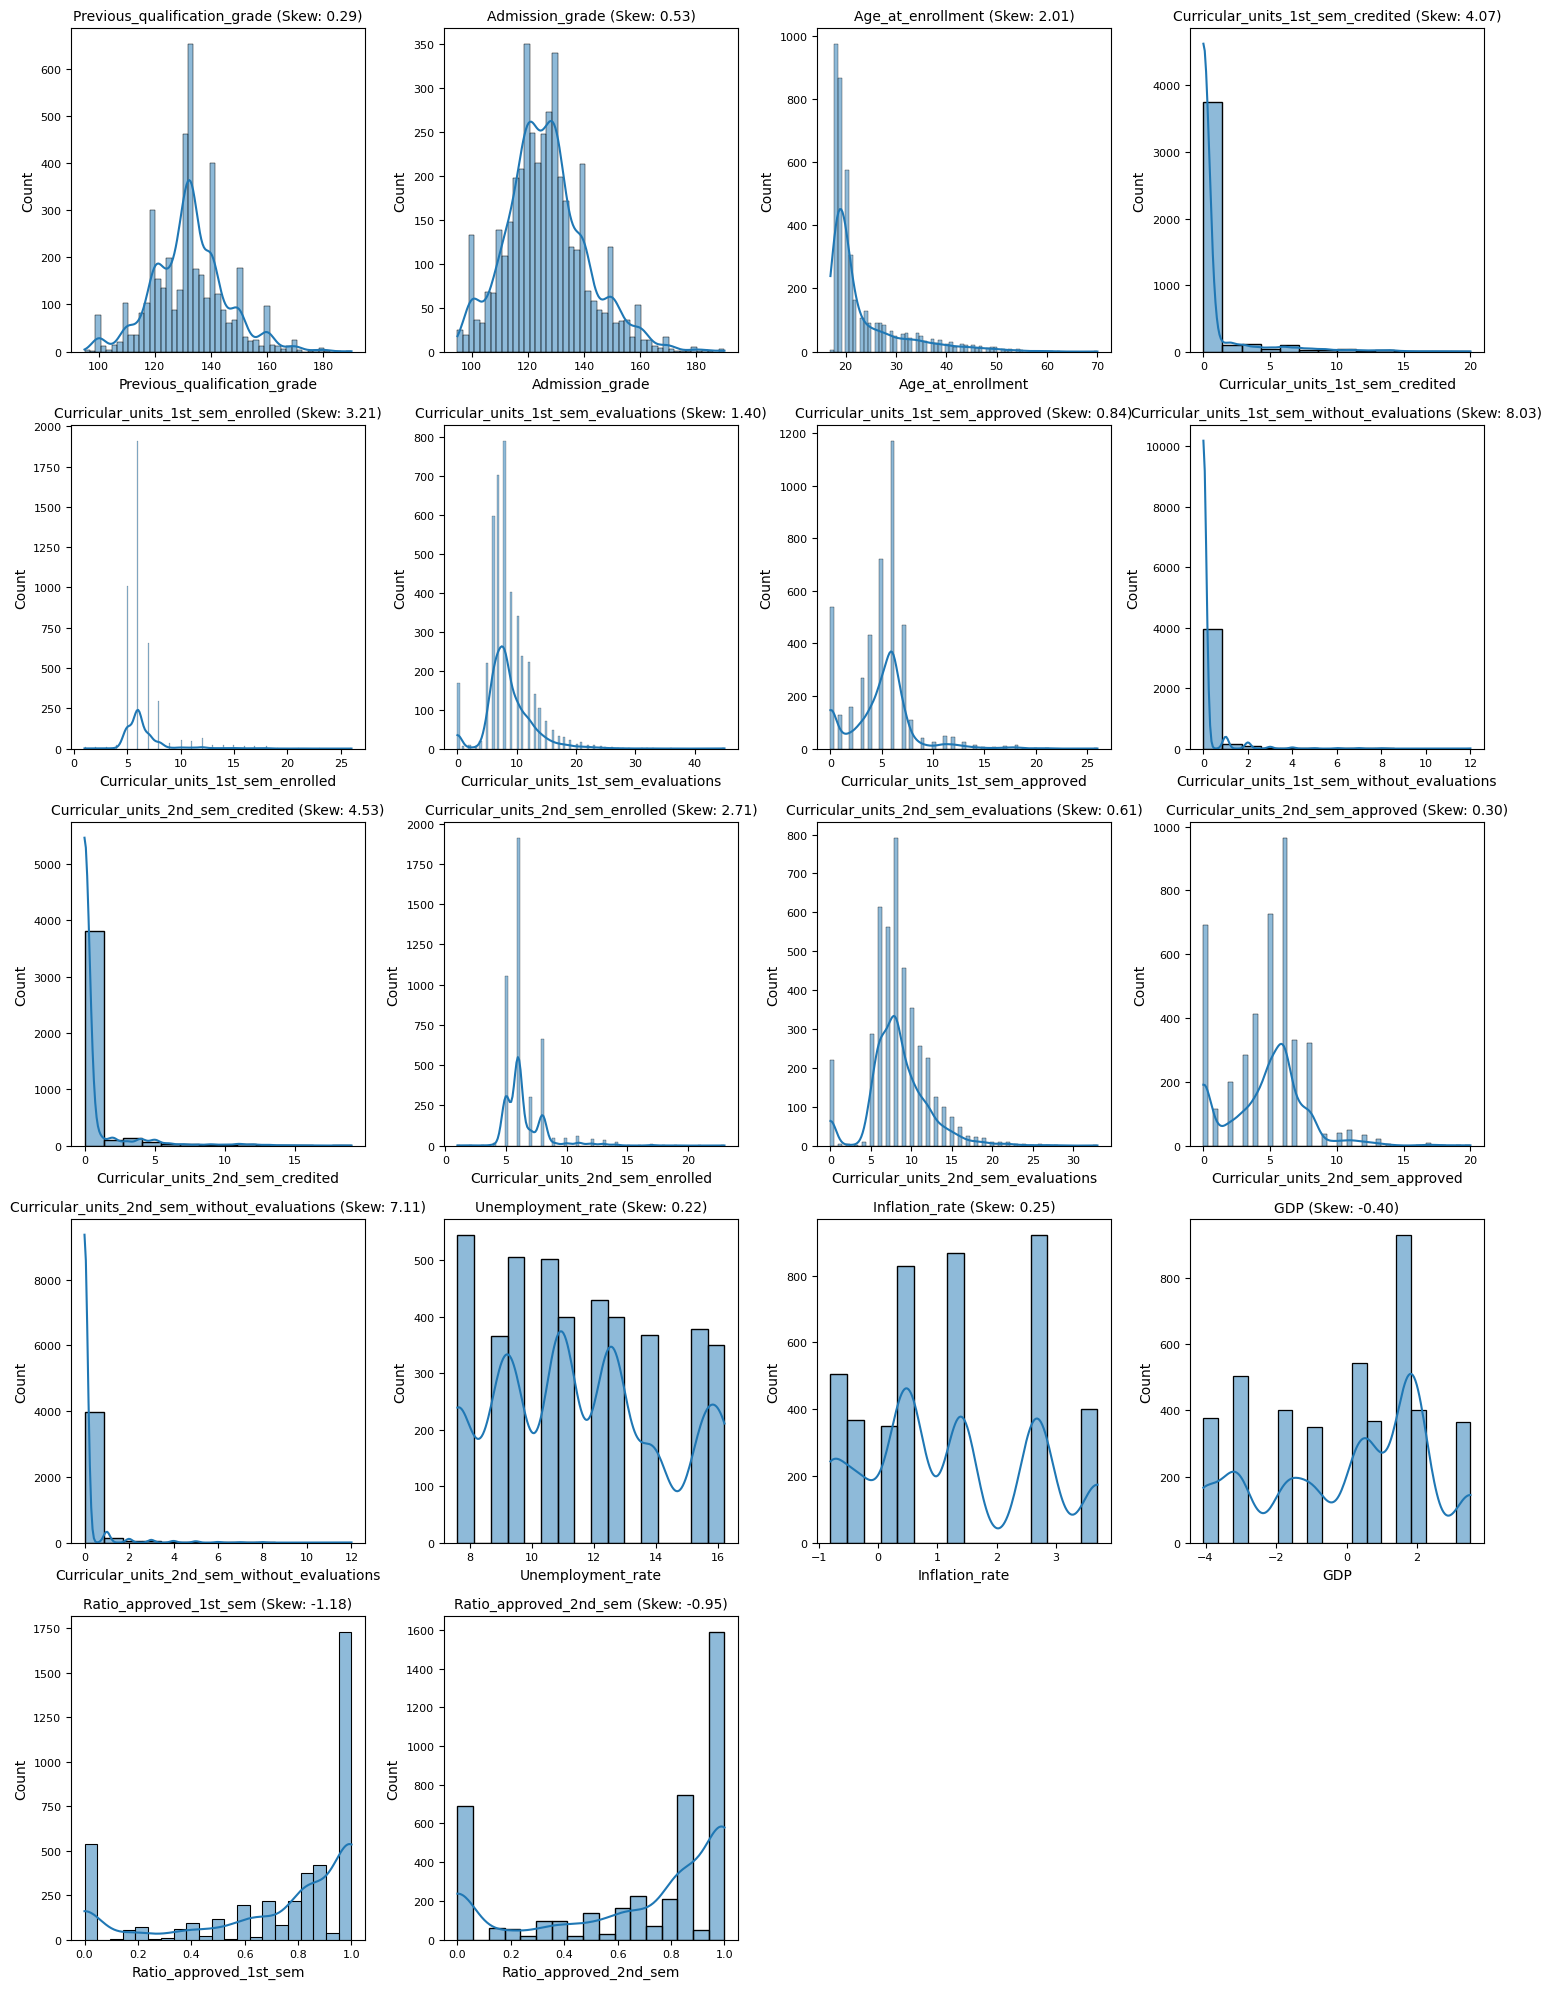

In [30]:
num_cols = len(numerical)
ncols = min(num_cols, 4)
nrows = (num_cols + ncols -1) // ncols

fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(15,4 * nrows))
axes = axes.flatten()

for i, col in enumerate(numerical):
  ax = axes[i]
  sns.histplot(df[col], kde=True, ax=ax)
  ax.set_title(f'{col} (Skew: {df[col].skew():.2f})', fontsize=10)
  ax.tick_params(axis='both', labelsize=8)

if num_cols < len(axes):
  for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. `Previous_qualification_grade` & `Admission_grade`: Kemungkinan distribusinya condong ke kiri (negatif). Sebagian besar mahasiswa yang diterima cenderung memiliki nilai yang tinggi, sementara hanya sedikit yang memiliki nilai sangat rendah sebagai outlier. Artinya, mayoritas mahasiswa menunjukkan performa akademik yang baik sebelum diterima, meskipun ada beberapa yang nilainya berada jauh di bawah rata-rata.

2. `Age_at_enrollment`: Kemungkinan condong ke kanan (positif). Sebagian besar mahasiswa cenderung berusia muda (sekitar 18-22 tahun), sementara hanya sedikit yang berusia lebih tua, seperti mahasiswa non-tradisional. Jaya Jaya Institut umumnya menerima lulusan baru dari sekolah menengah, meskipun ada sejumlah kecil mahasiswa yang masuk di usia lebih dewasa, seperti mereka yang kuliah paruh waktu atau kembali menempuh pendidikan.

3.  `Curricular_units_1st_sem_credited` & `Curricular_units_2nd_sem_credited`: Kemungkinan condong ke kanan (positif) karena sebagian besar mahasiswa mungkin hanya mentransfer sedikit kredit, sementara sebagian kecil lainnya memiliki jumlah kredit transfer yang cukup besar.


4. `Curricular_units_1st_sem_enrolled` & `Curricular_units_2nd_sem_enrolled`: Distribusinya cenderung simetris atau sedikit miring, karena banyak mahasiswa mengambil jumlah mata kuliah yang serupa.

5. `Curricular_units_1st_sem_evaluations`, `Curricular_units_2nd_sem_evaluations`, `Curricular_units_1st_sem_approved` & `Curricular_units_2nd_sem_approved`:  Distribusi bisa condong ke kiri (negatif) jika mayoritas mahasiswa berhasil menyelesaikan sebagian besar unit yang dinilai/disetujui, namun ada sejumlah kecil yang gagal banyak sehingga menarik ekor distribusi ke kiri. Alternatifnya, distribusi bisa bimodal jika terdapat dua kelompok yang kontras: satu yang berhasil dan satu lagi yang gagal secara signifikan.

6. `Curricular_units_1st_sem_without_evaluations` & `Curricular_units_2nd_sem_without_evaluations`: Kemungkinan besar distribusinya sangat miring ke kanan (positif), karena kebanyakan mahasiswa hanya memiliki sedikit atau tidak ada unit tanpa evaluasi, sedangkan hanya segelintir yang memiliki jumlah unit tanpa evaluasi yang tinggi.

7. `Unemployment_rate`, `Inflation_rate`, `GDP`: Distribusinya cenderung mendekati simetris atau hanya sedikit condong, tergantung pada seberapa bervariasi kondisi ekonomi di daerah asal mahasiswa. Secara umum, perubahan dalam indikator ekonomi ini tidak terlalu ekstrem. Variabel-variabel ini mencerminkan situasi makroekonomi yang melatarbelakangi mahasiswa. Jika terdapat kemiringan yang signifikan, itu bisa mengindikasikan bahwa mayoritas mahasiswa berasal dari wilayah dengan kondisi ekonomi yang sangat baik atau sebaliknya, sangat buruk.

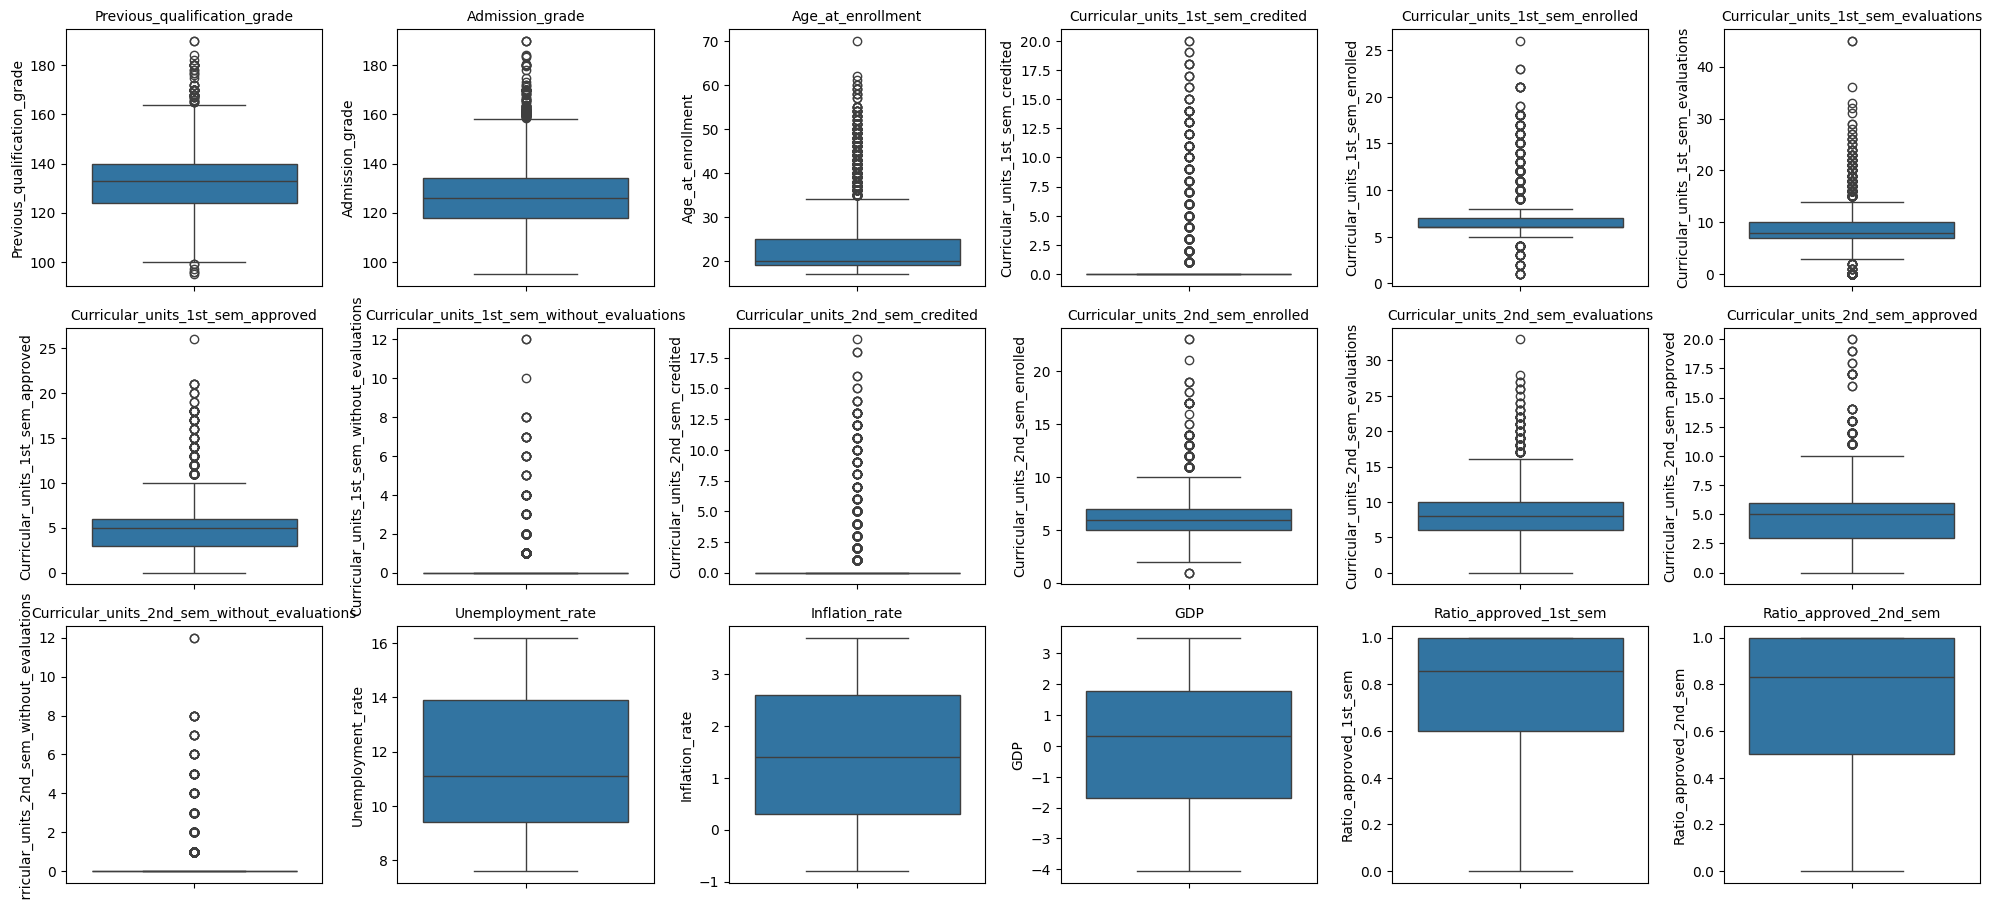

In [31]:
plt.figure(figsize=(20,15))
for i, col in enumerate(numerical, 1):
  plt.subplot(5, 6, i)
  sns.boxplot(y=df[col])
  plt.title(col, fontsize=10)
  plt.tight_layout()

plt.show()

1. `Previous_qualification_grade & Admission_grade`: Kedua variabel ini memiliki distribusi nilai yang relatif seimbang, namun terdapat beberapa nilai ekstrem di sisi atas. Hal ini mengindikasikan adanya sejumlah kecil mahasiswa dengan nilai kualifikasi atau penerimaan yang sangat tinggi dibandingkan lainnya.

2. `Age_at_enrollment`:
Terlihat banyak outlier di sisi kanan, yang menunjukkan ada sebagian mahasiswa yang mulai kuliah pada usia yang jauh lebih tua dibandingkan mayoritas. Nilai median yang rendah menunjukkan bahwa sebagian besar mahasiswa berusia dalam rentang umum untuk masuk perguruan tinggi.

3.  `Curricular_units (_credited, _approved, _grade, _enrolled, _evaluations)`: Secara keseluruhan, variabel-variabel ini memperlihatkan adanya sejumlah outlier dengan nilai tinggi. Artinya, ada beberapa mahasiswa yang mengambil, menyelesaikan, atau menjalani evaluasi untuk unit mata kuliah dalam jumlah yang jauh lebih besar dibandingkan mahasiswa lain. Nilai median umumnya rendah (seringkali di bawah 10 atau bahkan 0), yang menunjukkan bahwa mayoritas mahasiswa hanya memiliki sedikit unit yang dikreditkan, disetujui, atau dievaluasi—atau bahkan tidak ada data sama sekali untuk unit-unit tertentu bagi sebagian besar mahasiswa. Secara khusus, variabel `Curricular_units` menunjukkan bahwa sebagian besar mahasiswa memiliki nol unit tanpa evaluasi, dengan hanya sedikit yang memiliki jumlah unit tanpa evaluasi dalam angka yang tinggi sebagai outlier.

4. `Unemployment_rate`, `Inflation_rate`, `GDP`: Variabel ini memiliki distribusi yang lebih padat atau terkonsentrasi jika dibandingkan dengan variabel lainnya, terlihat dari ukuran boxplot yang lebih kecil. `Unemployment_rate` dan `Inflation_rate` memperlihatkan distribusi yang mendekati normal dengan beberapa nilai ekstrem.
Sementara `GDP` juga memiliki distribusi yang terfokus, tetapi tetap menampilkan beberapa outlier.

Meskipun terdapat outlier dalam banyak variabel, nilai-nilai tersebut tidak menunjukkan kejanggalan atau kesalahan data yang mencolok. Oleh karena itu, keberadaan outlier masih relevan dan tidak perlu diabaikan dalam analisis.

In [32]:
def t_test_status_numerical(df, numerical, status_col='Status'):
    if status_col not in df.columns:
        print(f"Kolom '{status_col}' tidak ditemukan dalam DataFrame.")
        return

    status_values = df[status_col].unique()
    if len(status_values) != 2:
        print(f"Kolom '{status_col}' harus memiliki tepat dua kategori untuk t-test. Ditemukan: {status_values}")
        return

    group1 = df[df[status_col] == status_values[0]]
    group2 = df[df[status_col] == status_values[1]]

    print(f"Melakukan t-test antara '{status_col}' ({status_values[0]} vs {status_values[1]}) dan kolom numerik:\n")

    results = {}
    for col in numerical:
        if col in df.columns:
            t_statistic, p_value = stats.ttest_ind(group1[col], group2[col], nan_policy='omit')
            results[col] = {'t_statistic': t_statistic, 'p_value': p_value}
            alpha = 0.05
            if p_value < alpha:
                significance = "signifikan"
            else:
                significance = "tidak signifikan"
            print(f"- {col}: t = {t_statistic:.3f}, p = {p_value:.3f} (Perbedaan rata-rata {significance})")
        else:
            print(f"- Kolom '{col}' tidak ditemukan dalam DataFrame.")

    return results


results_ttest = t_test_status_numerical(df.copy(), numerical)
print(results_ttest)

Melakukan t-test antara 'Status' (1 vs 0) dan kolom numerik:

- Previous_qualification_grade: t = 5.239, p = 0.000 (Perbedaan rata-rata signifikan)
- Admission_grade: t = 6.274, p = 0.000 (Perbedaan rata-rata signifikan)
- Age_at_enrollment: t = -17.655, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_credited: t = 1.766, p = 0.077 (Perbedaan rata-rata tidak signifikan)
- Curricular_units_1st_sem_enrolled: t = 7.888, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_evaluations: t = 5.203, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_approved: t = 37.719, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_1st_sem_without_evaluations: t = -3.758, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_2nd_sem_credited: t = 2.027, p = 0.043 (Perbedaan rata-rata signifikan)
- Curricular_units_2nd_sem_enrolled: t = 9.480, p = 0.000 (Perbedaan rata-rata signifikan)
- Curricular_units_2nd_sem_evaluations: t =

### Menghapus kolom yang tidak berhubungan dengan 'Status'

In [33]:
columns_to_drop = ['Nacionality', 'Educational_special_needs', 'International','Inflation_rate','Curricular_units_1st_sem_credited','Unemployment_rate']

df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [34]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
1,1,15,1,9254,1,1,160.0,1,3,3,...,0,0,6,6,6,0,0.79,1,1.000000,1.000000
2,1,1,5,9070,1,1,122.0,37,37,9,...,0,0,6,0,0,0,1.74,0,0.000000,0.000000
3,1,17,2,9773,1,1,122.0,38,37,5,...,0,0,6,10,5,0,-3.12,1,1.000000,0.833333
4,2,39,1,8014,0,1,100.0,37,38,9,...,0,0,6,6,6,0,0.79,1,0.833333,1.000000
5,2,39,1,9991,0,19,133.1,37,37,9,...,0,0,5,17,5,5,-0.92,1,1.000000,1.000000


In [35]:
numerical = df.select_dtypes(include=[np.number]).columns.tolist()
numerical

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_without_evaluations',
 'GDP',
 'Ratio_approved_1st_sem',
 'Ratio_approved_2nd_sem']

In [36]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Status']

## Modeling

### Menangani data tidak seimbang dengan undersampling

In [37]:
df['Status'].value_counts()

,count
Status,
1,2900
0,1344


In [38]:
df_class_0 = df[df['Status'] == '0']
df_class_1 = df[df['Status'] == '1']

In [39]:
df_class_1_undersampled = resample(df_class_1,
                                   replace=False,
                                   n_samples=len(df_class_0),
                                   random_state=42)

In [40]:
df_undersampled = pd.concat([df_class_0, df_class_1_undersampled])

In [41]:
df_undersampled['Status'].value_counts()

,count
Status,
0,1344
1,1344


### Melakukan pembagian dataset 80:20

In [42]:
X = df_undersampled.drop(columns='Status')
y = df_undersampled['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2150, 30), (538, 30), (2150,), (538,))

In [43]:
numerical

['Previous_qualification_grade',
 'Admission_grade',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_evaluations',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_without_evaluations',
 'Curricular_units_2nd_sem_credited',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_without_evaluations',
 'GDP',
 'Ratio_approved_1st_sem',
 'Ratio_approved_2nd_sem']

In [44]:
categorical = ['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder']

categorical

['Marital_status',
 'Application_mode',
 'Application_order',
 'Course',
 'Daytime_evening_attendance',
 'Previous_qualification',
 'Mothers_qualification',
 'Fathers_qualification',
 'Mothers_occupation',
 'Fathers_occupation',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder']

In [45]:
numerical_pipeline = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

ordinal_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy='most_frequent')),
	('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('preprocessing numerical', numerical_pipeline, numerical),
    ('preprocessing ordinal', ordinal_pipeline, categorical)
])

### Menentukan algoritma

In [54]:
algoritma = RandomForestClassifier()

model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('rfc', algoritma)
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Evaluation

In [55]:
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_rep)

print("\nConfusion Matrix:")
print(confusion_mat)

print(f"\nAkurasi Model: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       276
           1       0.83      0.87      0.85       262

    accuracy                           0.85       538
   macro avg       0.85      0.85      0.85       538
weighted avg       0.85      0.85      0.85       538


Confusion Matrix:
[[228  48]
 [ 33 229]]

Akurasi Model: 0.8494


Model cukup seimbang dalam mendeteksi kedua kelas (0 dan 1), dengan akurasi tinggi sebesar 83,64%, serta nilai precision, recall, dan f1-score yang relatif merata.

## Menyimpan model

In [58]:
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

## Menyimpan data

In [59]:
df.to_csv('data_2.csv', index=False)

In [60]:
df = pd.read_csv('data_2.csv')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_without_evaluations,GDP,Status,Ratio_approved_1st_sem,Ratio_approved_2nd_sem
0,1,15,1,9254,1,1,160.0,1,3,3,...,0,0,6,6,6,0,0.79,1,1.000000,1.000000
1,1,1,5,9070,1,1,122.0,37,37,9,...,0,0,6,0,0,0,1.74,0,0.000000,0.000000
2,1,17,2,9773,1,1,122.0,38,37,5,...,0,0,6,10,5,0,-3.12,1,1.000000,0.833333
3,2,39,1,8014,0,1,100.0,37,38,9,...,0,0,6,6,6,0,0.79,1,0.833333,1.000000
4,2,39,1,9991,0,19,133.1,37,37,9,...,0,0,5,17,5,5,-0.92,1,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4239,1,1,6,9773,1,1,125.0,1,1,5,...,0,0,6,8,5,0,-4.06,1,0.833333,0.833333
4240,1,1,2,9773,1,1,120.0,1,1,9,...,0,0,6,6,2,0,2.02,0,1.000000,0.333333
4241,1,1,1,9500,1,1,154.0,37,37,9,...,0,0,8,9,1,0,0.79,0,1.000000,0.125000
4242,1,1,1,9147,1,1,180.0,37,37,7,...,0,0,5,6,5,0,-3.12,1,1.000000,1.000000
